In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

# load the data

In [109]:
df=pd.read_csv('./sqliv2.csv',encoding='utf-16')

# EDA for the dataset

In [110]:

df.shape

(33761, 2)

In [111]:
df.dtypes

,0
Sentence,object
Label,int64


In [112]:
df.head()

,Sentence,Label
0,NaN,1
1,""" or pg_sleep ( __TIME__ ) --",1
2,create user name identified by pass123 tempora...,1
3,%29,1
4,' AND 1 = utl_inaddr.get_host_address ( ( S...,1


In [113]:
df.tail()

,Sentence,Label
33756,syrett,0
33757,arrechea bellveh,0
33758,1664,0
33759,almaluez,0
33760,f6lo40r06,0


In [114]:
df.isna().sum()

,0
Sentence,4
Label,0


In [115]:
df[df['Sentence'].isna()]

,Sentence,Label
0,NaN,1
951,NaN,0
3953,NaN,1
3995,NaN,1


In [116]:
df.dropna(inplace=True)

In [117]:
df.reset_index(drop=True,inplace=True)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33757 entries, 0 to 33756
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  33757 non-null  object
 1   Label     33757 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 527.6+ KB


In [119]:
df.duplicated().sum()

np.int64(30)

In [120]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)

In [121]:
df.duplicated().sum()

np.int64(0)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33727 entries, 0 to 33726
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  33727 non-null  object
 1   Label     33727 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 527.1+ KB


# check the classses distribution

In [123]:
class_distribution=pd.DataFrame(df['Label'].value_counts())

In [124]:
class_distribution

,count
Label,
0,22303
1,11424


# Bar plot that shows the classes distribution

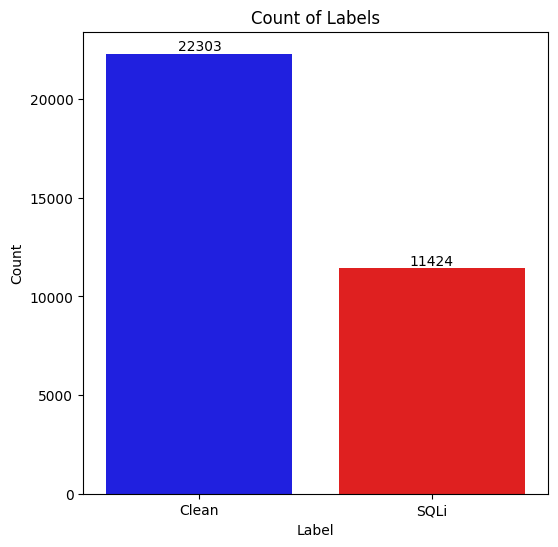

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")
# Customized bar plot
plt.figure(figsize=(6, 6))
ax = sns.barplot(x='Label', y='count', data=class_distribution, palette=['blue', 'red'])

# Rename the x-axis labels
plt.xticks(ticks=[0, 1], labels=['Clean', 'SQLi'])

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Label')
plt.title('Count of Labels')
plt.ylabel('Count')
plt.show()


# Plot to check if the data is labels is ordered

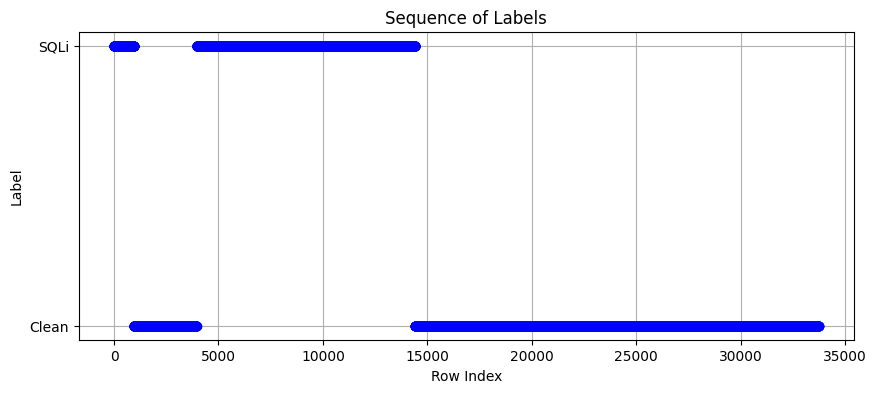

In [126]:
import matplotlib.pyplot as plt

# Plot the labels
plt.figure(figsize=(10, 4))
plt.plot(df['Label'], marker='o', linestyle='', color='b')
plt.title('Sequence of Labels')
plt.xlabel('Row Index')
plt.ylabel('Label')
plt.yticks([0, 1], ["Clean", "SQLi"])
plt.grid(True)
plt.show()


In [127]:
df['Label']

,Label
0,1
1,1
2,1
3,1
4,1
...,...
33722,0
33723,0
33724,0
33725,0


# Data Augmentation

In [128]:
df2=pd.read_csv('./payload_full.csv')

In [129]:
df2

,payload,length,attack_type,label
0,c/ caridad s/n,14,norm,norm
1,"campello, el",12,norm,norm
2,40184,5,norm,norm
3,1442431887503330,16,norm,norm
4,nue37,5,norm,norm
...,...,...,...,...
31062,"<script a="">"" id=xss src=""http://ha.ckers.org/...",63,xss,anom
31063,"<script a="">"" '' id=xss src=""http://ha.ckers.o...",66,xss,anom
31064,"<script ""a='>'"" id=xss src=""http://ha.ckers.or...",65,xss,anom
31065,"<script a=`>` id=xss src=""http://ha.ckers.org/...",63,xss,anom


In [130]:
df2.shape

(31067, 4)

In [131]:
df2.head()

,payload,length,attack_type,label
0,c/ caridad s/n,14,norm,norm
1,"campello, el",12,norm,norm
2,40184,5,norm,norm
3,1442431887503330,16,norm,norm
4,nue37,5,norm,norm


In [132]:
del df2['length']
del df2['label']

In [133]:
df2.head()

,payload,attack_type
0,c/ caridad s/n,norm
1,"campello, el",norm
2,40184,norm
3,1442431887503330,norm
4,nue37,norm


In [134]:
df2['attack_type'].unique()

array(['norm', 'sqli', 'xss', 'cmdi', 'path-traversal'], dtype=object)

In [135]:
df2.columns

Index(['payload', 'attack_type'], dtype='object')

In [136]:
df2.columns=['Sentence','Label']

In [137]:
df2['Label'].value_counts()

,count
Label,
norm,19304
sqli,10852
xss,532
path-traversal,290
cmdi,89


In [138]:
df2=df2[df2['Label']=='sqli']

In [139]:
df2.isna().sum()

,0
Sentence,0
Label,0


In [140]:
df2.duplicated().sum()

np.int64(0)

### Change the label from SQLi to 1, to match the first dataset structure

In [141]:
df2['Label']=1

In [142]:
df2['Label'].value_counts()

,count
Label,
1,10852


In [143]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10852 entries, 436 to 30545
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  10852 non-null  object
 1   Label     10852 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 254.3+ KB


In [144]:
df=pd.concat([df,df2])
df.reset_index(drop=True,inplace=True)

In [145]:
df.shape

(44579, 2)

In [146]:
after_redistribution=pd.DataFrame(df['Label'].value_counts())

In [147]:
after_redistribution

,count
Label,
0,22303
1,22276


In [148]:
df.duplicated().sum()

np.int64(392)

In [149]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

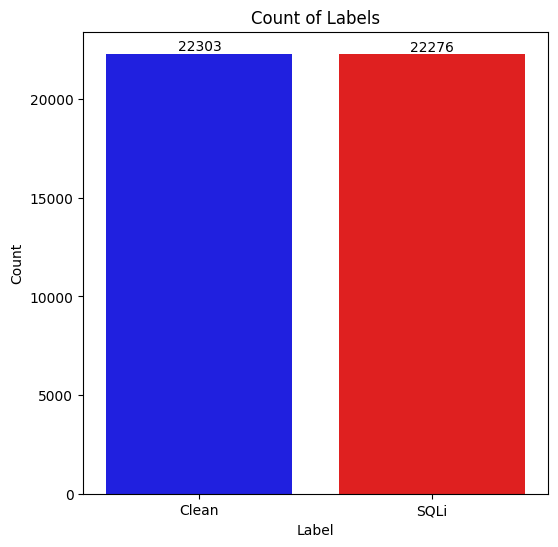

In [150]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Customized bar plot
plt.figure(figsize=(6, 6))
ax = sns.barplot(x='Label', y='count', data=after_redistribution, palette=['blue', 'red'])

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
plt.xticks(ticks=[0, 1], labels=['Clean', 'SQLi'])
plt.title('Count of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

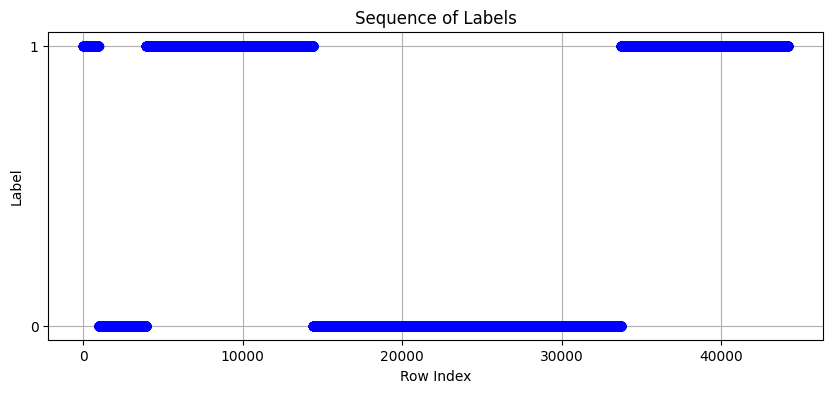

In [151]:
# Plot the labels
plt.figure(figsize=(10, 4))
plt.plot(df['Label'], marker='o', linestyle='', color='b')
plt.title('Sequence of Labels')
plt.xlabel('Row Index')
plt.ylabel('Label')
plt.yticks([0, 1])
plt.grid(True)
plt.show()

In [152]:
df=df.sample(frac=1,random_state=42).reset_index(drop=True)

In [153]:
df.head()

,Sentence,Label
0,friera de valverde,0
1,1'||(select 'ypqa' where 1961=1961 or 6793=(se...,1
2,1') where 2808=2808;select count(*) from domai...,1
3,1' in boolean mode);call regexp_substring(repe...,1
4,"1');select count(*) from generate_series(1,500...",1


In [154]:
print(df.iloc[4
              ]['Sentence'])

1');select count(*) from generate_series(1,5000000)--


# train test split

In [155]:
# split the dataset into training and testing sets
x=df['Sentence']
y=df['Label']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

### TF-IDF Vectorizer


In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    analyzer='word',
    token_pattern=r'(?u)\b\w\w+\b|--|[\"\';#\-+()/\*\*/]',
    max_df=0.9,
    min_df=2,
    norm='l2',
    ngram_range=(1, 2),
    lowercase=True
)
# Fit and transform training data
x_train_vectorized = tfidf_vectorizer.fit_transform(x_train)
x_test_vectorized = tfidf_vectorizer.transform(x_test)


# Grid Search to find best vectorizer parameters

In [162]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score
# Define the pipeline
pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),  # TfidfVectorizer
    ('clf', RandomForestClassifier(random_state=42))  # Random Forest
])

# Define the parameter grid
param_grid = {
    'tfidf__token_pattern': [
        r"(?u)\b\w+\b",  # Default: alphanumeric tokens
        r"(?u)\b\w+\b|[\"';=()#-]+|/\*|\*/|--" # Alphanumeric + special characters + SQL comments

    ]
}

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',  # Accuracy
    'recall': 'recall'       # Recall
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring=scoring,  # Use multiple scoring metrics
    refit='accuracy',  # Refit the best model on the full dataset using accuracy
    n_jobs=-1  # Use all available CPU cores
)

# Perform Grid Search
grid_search.fit(x, y)

# Print the best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Recall & Accuracy:", grid_search.best_score_)

Best Parameters: {'tfidf__token_pattern': '(?u)\\b\\w+\\b|[\\"\';=()#-]+|/\\*|\\*/|--'}
Best Recall & Accuracy: 0.9975784686897955


### Train RandomForestClassifier

In [166]:
# initialize and train the model
model=RandomForestClassifier(class_weight={0:1,1:5},random_state=42,min_samples_split=5,min_samples_leaf=2,n_jobs=-1)

model.fit(x_train_vectorized,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 5}, min_samples_leaf=2,
                       min_samples_split=5, n_jobs=-1, random_state=42)

### Random Search

In [167]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint,uniform

# define the parameter distributions for random serach
param_dist={
    'n_estimators':randint(100,300),  # Random integer between 100 and 300
    'max_depth': [None,10,20],    # Fixed choices
    'min_samples_split':randint(2,10),     # Random integer between 2 and 10
    'min_samples_leaf': randint(1,4),       # Random integer between 1 and 4
    'class_weight':[{0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 5}, 'balanced'] # Fixed choices
}


# initialize the rand serach
rand_search=RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    random_state=42
)

# Fit Randomized Search
rand_search.fit(x_train_vectorized, y_train)

# Best parameters and recall score
print("Best Parameters:", rand_search.best_params_)
print("Best Recall Score:", rand_search.best_score_)

Best Parameters: {'class_weight': {0: 1, 1: 5}, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 117}
Best Recall Score: 0.9964586278767378


### Grid Search To find best class_weight

In [168]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for class weights
param_grid = {
    # 'n_estimators': [100, 200, 300],
    # 'max_depth': [None, 10, 20],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 5}, 'balanced']
}

# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='recall',  # Use recall for evaluation
    n_jobs=-1
)

# Fit Grid Search
grid_search.fit(x_train_vectorized, y_train)

# Best parameters and recall score
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

Best Parameters: {'class_weight': {0: 1, 1: 3}}
Best Recall Score: 0.996230138048181


### Test on validation set

In [169]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

# Split the training time
x_train_small,x_val,y_train_small,y_val=train_test_split(
    x_train_vectorized,y_train,test_size=0.2,random_state=42
)

# measure training time
start_time=time.time()

# train the model on the smaller training set
model.fit(x_train_small,y_train_small)
# end time
end_time=time.time()
# calculate training time
training_time=end_time-start_time

# evaluate on the validation set
y_val_pred=model.predict(x_val)


# output results

print(f"Training Time: {training_time:.2f} seconds")
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))


Training Time: 3.79 seconds
Validation Accuracy: 0.9961810466760962


### Explore Importance deatures

In [171]:
features=pd.DataFrame(model.feature_importances_,index=tfidf_vectorizer.get_feature_names_out())
print(features.shape)
features.sort_values(by=0,ascending=False)


(5000, 1)


,0
),0.112631
(,0.068630
',0.059049
where,0.047577
and,0.038946
...,...
9801,0.000000
9804,0.000000
9921 9921,0.000000
9931,0.000000


### Cross Validation

In [172]:
from sklearn.model_selection import cross_val_score

# perform k-fold cross-validation
cv_scores=cross_val_score(model,x_train_vectorized,y_train,cv=5,scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.9960396  0.9950495  0.9950495  0.99434229 0.99632197]
Mean Cross-Validation Accuracy: 0.9953605748789013


### Model evaluation

Accuracy: 0.9964924190993437
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4461
           1       1.00      1.00      1.00      4377

    accuracy                           1.00      8838
   macro avg       1.00      1.00      1.00      8838
weighted avg       1.00      1.00      1.00      8838

Avg confidence level: 0.9857227211833929


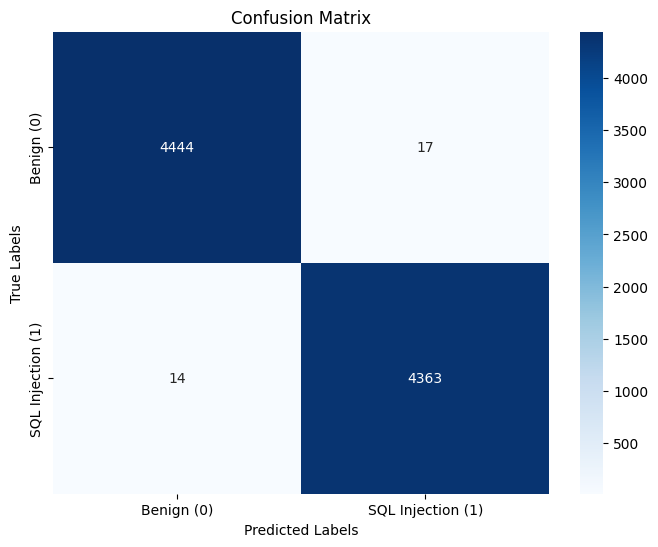

In [173]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(x_test_vectorized)
propabilities=model.predict_proba(x_test_vectorized)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
#Avg Confidence level
avg_confidence = propabilities.max(axis=1).mean()  # Average of the highest probability for each prediction

print("Avg confidence level:",avg_confidence)
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign (0)', 'SQL Injection (1)'],
            yticklabels=['Benign (0)', 'SQL Injection (1)'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


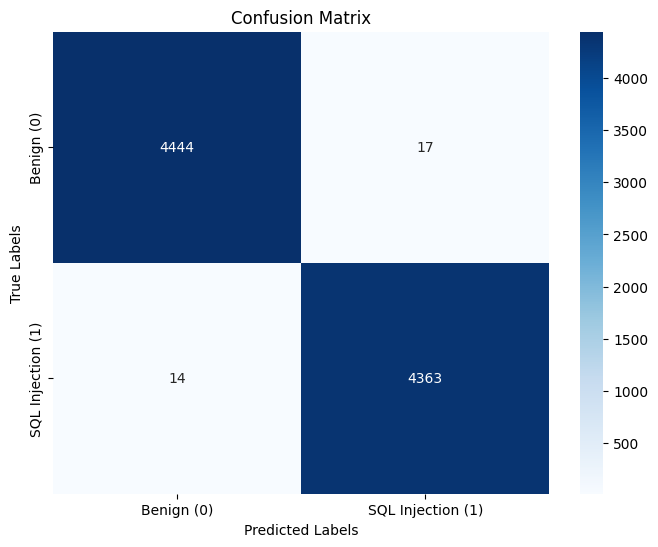

In [174]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign (0)', 'SQL Injection (1)'],
            yticklabels=['Benign (0)', 'SQL Injection (1)'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Misclassified samples


In [175]:
misclassified_indices = (y_pred != y_test)

# Extract misclassified samples
misclassified_samples = x_test[misclassified_indices]
misclassified_true_labels = y_test[misclassified_indices]
misclassified_predicted_labels = y_pred[misclassified_indices]
# Combine for analysis
df_misclassified = pd.DataFrame({
    'True Label': misclassified_true_labels,
    'Predicted Label': misclassified_predicted_labels,
    'Sample Data': misclassified_samples
})
# count of misclassified samples
print(df_misclassified.shape)

# Display the misclassified samples
df_misclassified[df_misclassified['Predicted Label']==0]

(31, 3)


,True Label,Predicted Label,Sample Data
31061,1,0,0x730065006c0065006300740020004000400076006500...
29891,1,0,UEs
9437,1,0,grant connect to name; grant resource to name;
24084,1,0,UEv
38888,1,0,*|
7573,1,0,.s
17782,1,0,",s"
39833,1,0,1
7403,1,0,%28
1147,1,0,delete


### Save the model for future use

In [178]:

import joblib
import os
os.makedirs( name='./models',exist_ok=True)
# Save the model and vectorizer
joblib.dump(model, './models/sql_injection_model.pkl')
joblib.dump(tfidf_vectorizer, './models/tfidf_vectorizer.pkl')

['./models/tfidf_vectorizer.pkl']